In [7]:
import glob
import unidecode
import unicodedata
import string
import torch
import torch.nn as nn
import random
import os
import pickle
import matplotlib.pyplot as plt

In [4]:
def findFiles(path): return glob.glob(path)


all_letters = string.ascii_letters + " .,;'"

n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

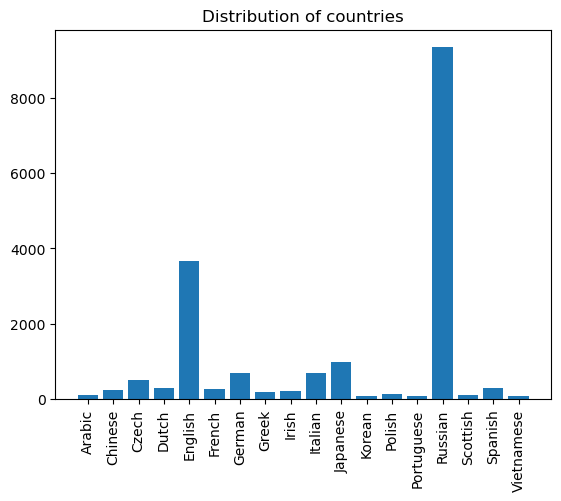

In [10]:
def get_names_count_full(country_path):
    all_categories = []
    category_lines = {}
    
    for filename in os.listdir(country_path):
        category = filename.split('.')[0]
        all_categories.append(category)
        file_path = os.path.join(country_path, filename)
        lines = readLines(file_path)
        lines_distinct = []
        for line in lines:
            if line not in lines_distinct:
                lines_distinct.append(line)
        random.shuffle(lines_distinct)
        lines_num = len(lines_distinct)
        if lines_num > 1000:
            lines_distinct = lines_distinct
        lines_num = len(lines_distinct)
        category_lines[category] = lines_num
    return category_lines
proj_dir = os.path.dirname(os.path.dirname(os.getcwd()))

country_path_full = proj_dir + "/DataCollectionLab1/data/countryNamesOld"
countries_full = get_names_count_full(country_path_full)
# make histogram of countries
plt.bar(countries_full.keys(), countries_full.values())
plt.xticks(rotation=90)
plt.title("Distribution of countries")
plt.show()

In [12]:
def get_names_count(country_path):
    all_categories = []
    category_lines = {}
    
    for filename in os.listdir(country_path):
        category = filename.split('.')[0]
        all_categories.append(category)
        file_path = os.path.join(country_path, filename)
        lines = readLines(file_path)
        lines_distinct = []
        for line in lines:
            if line not in lines_distinct:
                lines_distinct.append(line)
        random.shuffle(lines_distinct)
        lines_num = len(lines_distinct)
        if lines_num > 1000:
            lines_distinct = lines_distinct[:1000]
        lines_num = len(lines_distinct)
        category_lines[category] = lines_num
    return category_lines

proj_dir = os.path.dirname(os.path.dirname(os.getcwd()))

country_path_gemini = proj_dir + "/DataCollectionLab1/data/countryNames"
country_path_old = proj_dir + "/DataCollectionLab1/data/countryNamesOld"
countries_w_gemini = get_names_count(country_path_gemini)
countries_old = get_names_count(country_path_old)


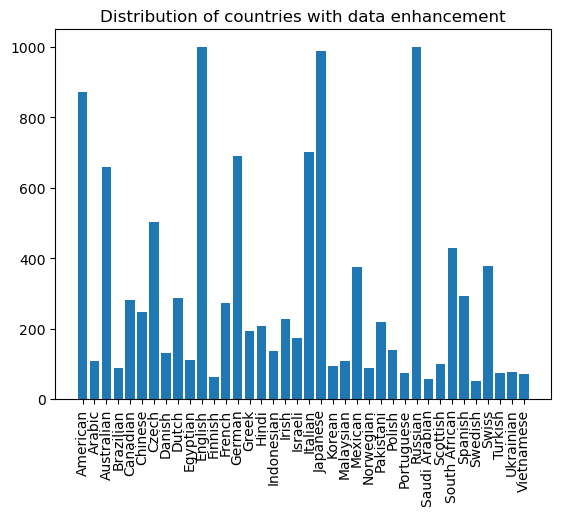

In [16]:
# Make graph for countries_w_gemini
plt.bar(countries_w_gemini.keys(), countries_w_gemini.values())
plt.xticks(rotation=90)
plt.title("Distribution of countries with data enhancement")
plt.show()

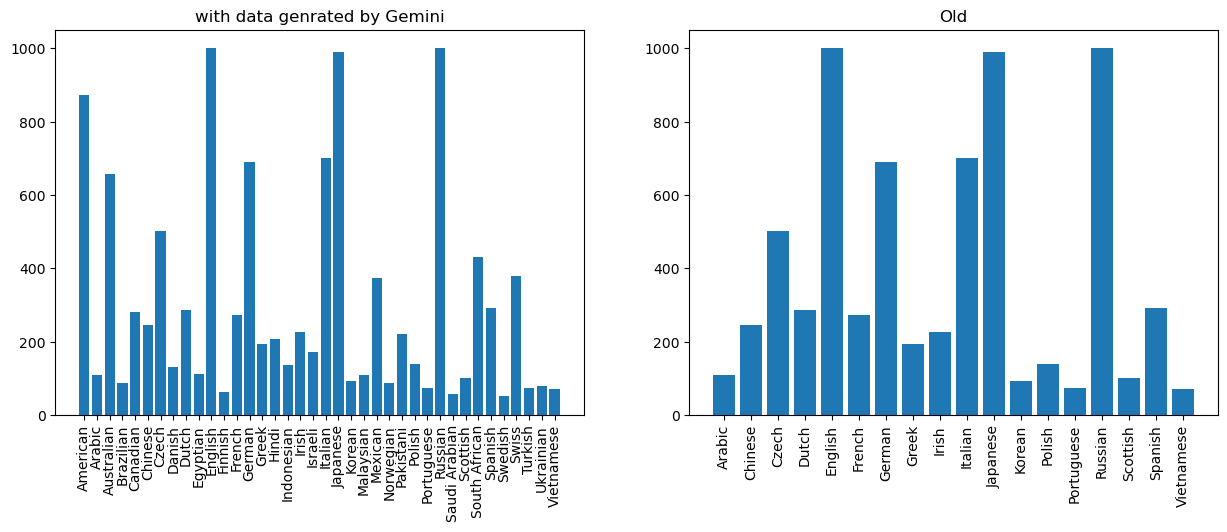

In [6]:
# make 2 histograms of countries and display next to eachother
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(countries_w_gemini.keys(), countries_w_gemini.values())
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=90)
axs[0].set_title('with data genrated by Gemini')

axs[1].bar(countries_old.keys(), countries_old.values())
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)

axs[1].set_title('Old')
plt.show()